## Object Detection using YOLO-V5

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.1/618.1 kB 11.7 MB/s eta 0:00:00


In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15990, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15990 (delta 15), reused 16 (delta 11), pack-reused 15967
Receiving objects: 100% (15990/15990), 14.64 MiB | 20.23 MiB/s, done.
Resolving deltas: 100% (10977/10977), done.


In [3]:
%cd yolov5/
!git lfs pull

/content/yolov5


In [4]:
# Upload file with images and labels here
!unzip ../setup.zip

Archive:  ../setup.zip
  inflating: data.yaml               
   creating: images/
  inflating: images/image_1.jpg      
  inflating: images/image_10.jpg     
  inflating: images/image_11.jpg     
  inflating: images/image_12.jpg     
  inflating: images/image_13.jpg     
  inflating: images/image_14.jpg     
  inflating: images/image_15.jpg     
  inflating: images/image_16.jpg     
  inflating: images/image_17.jpg     
  inflating: images/image_18.jpg     
  inflating: images/image_19.jpg     
  inflating: images/image_2.jpg      
  inflating: images/image_20.jpg     
  inflating: images/image_21.jpg     
  inflating: images/image_22.jpg     
  inflating: images/image_23.jpg     
  inflating: images/image_24.jpg     
  inflating: images/image_25.jpg     
  inflating: images/image_26.jpg     
  inflating: images/image_27.jpg     
  inflating: images/image_28.jpg     
  inflating: images/image_29.jpg     
  inflating: images/image_3.jpg      
  inflating: images/image_30.jpg     
  infl

In [ ]:
# weights given: yolov5l.pt (directly gets downloaded from the internet)
# when training again, give the path to the best.pt (weights)[ initially i gave 200 epochs, after that give additional 300,200 so total 700 epochs]

In [5]:
%cd /content/yolov5

/content/yolov5


In [6]:
!python train.py --img 900 --batch=2 --epochs 10 --data /content/yolov5/data.yaml --weights /content/best.pt

requirements: Ultralytics requirement ['gitpython'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 196.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.3s, installed 1 package: ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=/content/best.pt, cfg=, data=/content/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=2, imgsz=900, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_al

Add the best.pt now in the train.py to resume training from this weights

In [7]:
!python detect.py --img 900 --source /content/yolov5/images/image_12.jpg --weights /content/best.pt

detect: weights=['/content/best.pt'], source=/content/yolov5/images/image_12.jpg, data=data/coco128.yaml, imgsz=[900, 900], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-223-g005dcfa Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46194438 parameters, 0 gradients, 107.9 GFLOPs
WARNING ⚠️ --img-size [900, 900] must be multiple of max stride 32, updating to [928, 928]
image 1/1 /content/yolov5/images/image_12.jpg: 576x928 2 views, 2 buttons, 1 alert, 2 texts, 82.8ms
Speed: 0.8ms pre-process, 82.8ms inference, 2.1ms NMS per image at shape (1, 3, 928, 928)
Results saved to runs/detect/exp


In [8]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch
from google.colab.patches import cv2_imshow
import cv2

#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
model = torch.hub.load('.', 'custom', path='/content/best.pt', source='local')
im = '/content/yolov5/images/image_16.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v7.0-223-g005dcfa Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46194438 parameters, 0 gradients, 107.9 GFLOPs
Adding AutoShape... 
image 1/1: 550x900 9 buttons, 1 drop-down
Speed: 15.1ms pre-process, 49.7ms inference, 1.8ms NMS per image at shape (1, 3, 416, 640)


In [9]:
temp = results.pandas()

In [10]:
temp.xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,149.523651,356.294037,225.731766,399.248230,0.887700,3,button
1,148.162872,292.673370,224.493942,335.799835,0.886683,3,button
2,148.493729,420.470734,225.627640,460.189636,0.885381,3,button
3,61.903431,296.710175,140.425507,333.106567,0.884372,3,button
4,59.362850,466.296722,142.485184,503.966339,0.881616,3,button
5,142.023132,466.451782,225.326889,504.457428,0.880844,3,button
6,61.926613,359.554443,146.966293,395.565369,0.876603,3,button
7,63.088432,423.553406,144.662277,457.301880,0.833919,3,button
8,58.935963,235.709930,245.247314,275.353973,0.797116,15,drop-down
9,146.960297,355.209808,225.881271,458.417511,0.315485,3,button


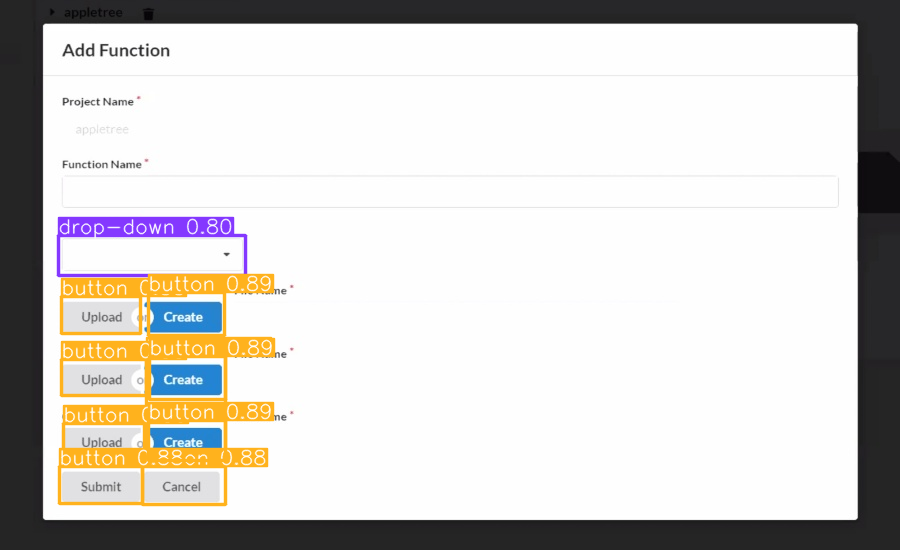

In [11]:
results.show()

### OCR-tesseract

In [12]:
!sudo apt install tesseract-ocr
!pip install pytesseract

from PIL import Image
import pytesseract
import shutil
import os

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,452 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [13]:
results.xyxy[0]

tensor([[1.49524e+02, 3.56294e+02, 2.25732e+02, 3.99248e+02, 8.87700e-01, 3.00000e+00],
        [1.48163e+02, 2.92673e+02, 2.24494e+02, 3.35800e+02, 8.86683e-01, 3.00000e+00],
        [1.48494e+02, 4.20471e+02, 2.25628e+02, 4.60190e+02, 8.85381e-01, 3.00000e+00],
        [6.19034e+01, 2.96710e+02, 1.40426e+02, 3.33107e+02, 8.84372e-01, 3.00000e+00],
        [5.93629e+01, 4.66297e+02, 1.42485e+02, 5.03966e+02, 8.81616e-01, 3.00000e+00],
        [1.42023e+02, 4.66452e+02, 2.25327e+02, 5.04457e+02, 8.80844e-01, 3.00000e+00],
        [6.19266e+01, 3.59554e+02, 1.46966e+02, 3.95565e+02, 8.76603e-01, 3.00000e+00],
        [6.30884e+01, 4.23553e+02, 1.44662e+02, 4.57302e+02, 8.33919e-01, 3.00000e+00],
        [5.89360e+01, 2.35710e+02, 2.45247e+02, 2.75354e+02, 7.97116e-01, 1.50000e+01],
        [1.46960e+02, 3.55210e+02, 2.25881e+02, 4.58418e+02, 3.15485e-01, 3.00000e+00]], device='cuda:0')

In [14]:
from PIL import  ImageEnhance, ImageFilter, ImageOps
import numpy as np
im = Image.open("/content/yolov5/images/image_16.jpg")
temp = []

enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('L') # grayscale
#im = im.convert('1', dither=Image.NONE) # Blackandwhite
#im = ImageOps.invert(im)

for coordinates in results.xyxy[0]:
    print(coordinates)
    x1 = int(coordinates[0])
    y1 = int(coordinates[1])
    x2 = int(coordinates[2])
    y2 = int(coordinates[3])

    im1 = im.crop((x1,y1,x2,y2))

    im1.show()
    rawData = pytesseract.image_to_string(im1)
    temp.append([rawData])

#im = ImageOps.invert(im)

#for coordinates in results.xyxy[0]:
    #print(coordinates)
    #x1 = int(coordinates[0])
    #y1 = int(coordinates[1])
    #x2 = int(coordinates[2])
    #y2 = int(coordinates[3])

    #im1 = im.crop((x1,y1,x2,y2))

    #im1.show()
    #rawData = pytesseract.image_to_string(im1)
    #temp.append([rawData])

tensor([149.52365, 356.29404, 225.73177, 399.24823,   0.88770,   3.00000], device='cuda:0')
tensor([148.16287, 292.67337, 224.49394, 335.79984,   0.88668,   3.00000], device='cuda:0')
tensor([148.49373, 420.47073, 225.62764, 460.18964,   0.88538,   3.00000], device='cuda:0')
tensor([ 61.90343, 296.71017, 140.42551, 333.10657,   0.88437,   3.00000], device='cuda:0')
tensor([ 59.36285, 466.29672, 142.48518, 503.96634,   0.88162,   3.00000], device='cuda:0')
tensor([142.02313, 466.45178, 225.32689, 504.45743,   0.88084,   3.00000], device='cuda:0')
tensor([ 61.92661, 359.55444, 146.96629, 395.56537,   0.87660,   3.00000], device='cuda:0')
tensor([ 63.08843, 423.55341, 144.66228, 457.30188,   0.83392,   3.00000], device='cuda:0')
tensor([ 58.93596, 235.70993, 245.24731, 275.35397,   0.79712,  15.00000], device='cuda:0')
tensor([1.46960e+02, 3.55210e+02, 2.25881e+02, 4.58418e+02, 3.15485e-01, 3.00000e+00], device='cuda:0')


In [15]:
for i in temp:
  print(i[0].replace('\n', '').replace('\x0c', ''))




ferns
Upload 
‘Submit
Cancel
Upload 0:
Upload

feredferns
